# Assignment 2 Machine Learning
Submitted by: 
Purushottam Padhya (s3847501),  Shitiz Garg (s3791123) 

# Introduction

This is an assignment which is based on the data set includes the images of Colon cancer. 

We have following two goals, 

>Task 1: One is to classify the given cell image is canceroud cell or not.

>Task 2: Second is to classfiy the images accordint to the cell types such as: fibroblast, inflamatory, epithelial or others.

# Load dataset and Preprocess the data

In [3]:
# Import basic python frameworks
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
import cv2
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle                          
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from PIL import Image
import glob

In [4]:
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
  tf.device(device_name)

Uncomment the following lines for Google Colab environemnt

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#!cp /content/drive/'MyDrive'/ML_Assignment2/data.zip .
#!unzip -q -o data.zip

In [7]:
#!ls data

In [8]:
main_data_frame = pd.read_csv('./data/data_labels_mainData.csv')

In [9]:
main_data_frame.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


In [10]:
main_data_frame.shape

(9896, 6)

In [11]:
main_data_frame.dtypes

InstanceID       int64
patientID        int64
ImageName       object
cellTypeName    object
cellType         int64
isCancerous      int64
dtype: object

In [12]:
extra_data_frame = pd.read_csv('./data/data_labels_extraData.csv')

In [13]:
extra_data_frame.head()

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0


In [14]:
extra_data_frame.shape

(10384, 4)

# Exploratory data analysis (EDA)

This is a first steps of Machine learning process before selecting any model for prediction. EDA refers the mojor critical process of Machine learning so it would optimize the given set by extracting important information, removing outliers, removing underlying assumption for test and determine the  optimal factor of settings and helps to choose the best model to predict the value with the help of different graphical visualization. 

Finding different statistical values and plotting those values on the graphical form will shows how data is distributed using mean, median and standard deviation of the datasets.
The state of the plot can help to maximize the pattern recognization of the data sets.
> EDA provide the distribution of data set help to familarise with the different attributes

In [15]:
main_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9896 entries, 0 to 9895
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   InstanceID    9896 non-null   int64 
 1   patientID     9896 non-null   int64 
 2   ImageName     9896 non-null   object
 3   cellTypeName  9896 non-null   object
 4   cellType      9896 non-null   int64 
 5   isCancerous   9896 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 464.0+ KB


>This info shows that there are no null datas in the given sets, also describe the data types of each attributes.

In [16]:
main_data_frame.describe()

,InstanceID,patientID,cellType,isCancerous
count,9896.000000,9896.000000,9896.000000,9896.000000
mean,10193.880154,29.762025,1.501516,0.412187
std,6652.912660,17.486553,0.954867,0.492253
min,1.000000,1.000000,0.000000,0.000000
25%,4135.750000,14.000000,1.000000,0.000000
50%,9279.500000,26.000000,2.000000,0.000000
75%,16821.250000,47.000000,2.000000,1.000000
max,22444.000000,60.000000,3.000000,1.000000


In [17]:
main_data_frame['cellTypeName'].value_counts()

epithelial      4079
inflammatory    2543
fibroblast      1888
others          1386
Name: cellTypeName, dtype: int64

In [18]:
main_data_frame['cellType'].value_counts()

2    4079
1    2543
0    1888
3    1386
Name: cellType, dtype: int64

> This shows that the equivalent value of the cell type  with cell names are as ,<br> 
   > 0 = fibroblast</br>
   > 1 =  inflamatory</br>
   > 2 = epithelial</br> 
   > 3 = others</br>

In [19]:
main_data_frame['isCancerous'].value_counts()

0    5817
1    4079
Name: isCancerous, dtype: int64

In [20]:
# cancer_data_frame['patientID'].value_counts()
main_data_frame.groupby(['patientID']).count()

,InstanceID,ImageName,cellTypeName,cellType,isCancerous
patientID,,,,,
1,19,19,19,19,19
2,33,33,33,33,33
3,136,136,136,136,136
4,127,127,127,127,127
5,169,169,169,169,169
6,198,198,198,198,198
7,253,253,253,253,253
8,332,332,332,332,332
9,348,348,348,348,348


>This data shows that there are total of 60 patients details in the given dataframe.

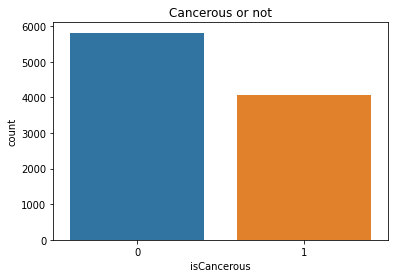

In [21]:
plot = plt.subplots(figsize=(6,4))
sns.countplot(x='isCancerous', data=main_data_frame)
plt.title("Cancerous or not")
plt.show()

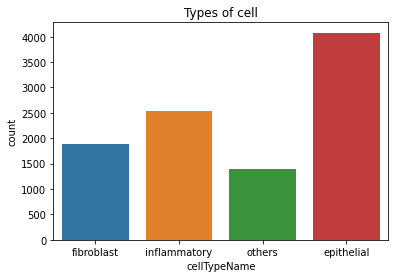

In [22]:
plot = plt.subplots(figsize=(6,4))
sns.countplot(x='cellTypeName', data=main_data_frame)
plt.title("Types of cell")
plt.show()

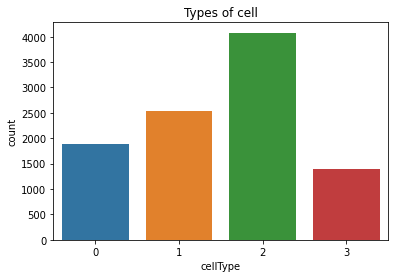

In [23]:
plot = plt.subplots(figsize=(6,4))
sns.countplot(x='cellType', data=main_data_frame)
plt.title("Types of cell")
plt.show()

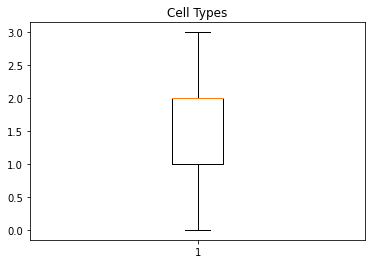

In [24]:
plt.boxplot(main_data_frame['cellType'])
plt.title('Cell Types')
plt.show()

Since InstanceID and patientID does not impact on the classification of cell types we decided to drop those columns in our modeling process.

In [25]:
main_data_frame = main_data_frame.drop(columns = ['InstanceID', 'patientID'])

In [26]:
main_data_frame.head()

,ImageName,cellTypeName,cellType,isCancerous
0,22405.png,fibroblast,0,0
1,22406.png,fibroblast,0,0
2,22407.png,fibroblast,0,0
3,22408.png,fibroblast,0,0
4,22409.png,fibroblast,0,0


In [27]:
class_names = ['epithelial', 'inflammatory',  'fibroblast' , 'others']

In [28]:
extra_data_frame.groupby(['patientID']).count()

,InstanceID,ImageName,isCancerous
patientID,,,
61,114,114,114
62,93,93,93
63,45,45,45
64,86,86,86
65,326,326,326
66,376,376,376
67,369,369,369
68,422,422,422
69,337,337,337


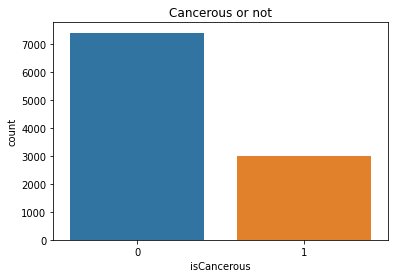

In [29]:
plot = plt.subplots(figsize=(6,4))
sns.countplot(x='isCancerous', data=extra_data_frame)
plt.title("Cancerous or not")
plt.show()

# Evaluation of Models


For the evaluation metric first we have selected the most popular evalaution method called F1-score which shows how accurate our model in prediction the target output variable in both train and test sets.

The second evaluation method we have set learning curve where we can evaluate loss value and accuracy by using different parameter to get the better result.

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

def evaluate_model(model, test_generator, batch_size):
  # setup data some placeholders
  y_hat_all = list()
  y_all = list()
  filenames = test_generator.filenames
  N_images = len(filenames)
  batches = 0

  # iterate through the data generator and predict for each batch
  # hold the predictions and labels
  for x,y in test_generator:
    y_hat = model.predict(x, verbose=0)
    y_hat = np.argmax(y_hat, axis = 1)
    y = np.argmax(y, axis = 1)
    y_hat_all = y_hat_all + y_hat.tolist()
    y_all = y_all + y.tolist()

    batches += 1
    if batches >= N_images / batch_size:
      # we need to break the loop by hand because
      # the generator loops indefinitely
      break

  # now you have made the predictions you can use any performance metric
  # you wish: either in sklearn or some function you have written
  print(confusion_matrix(y_all, y_hat_all))
  print("F1 score: ", f1_score(y_all, y_hat_all, average='macro'))

The learning curve method for evaluating overfitting is defined as:

In [31]:
import matplotlib.pyplot as plt
def plot_learning_curve(history):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], 'r--')
    plt.plot(history.history['val_loss'], 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], 'r--')
    plt.plot(history.history['val_accuracy'], 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()



# Task 1: Cancerous cell or Not

Now we are working on the given cell is cancerous or not which is defined by the column isCancerous where value 1 = cancerous cell and 0 = without cencerous cell

Since we are classifying the cell types according to isCancerous or not, we have addition data frame named extra_data_frame with label image is attributes isCancerous so we decided to enlarge the number of data in the datasets and combined the datasets for our task 1.

In [32]:
cancer_data_frame = pd.concat([main_data_frame[['ImageName', 'isCancerous']], extra_data_frame[['ImageName', 'isCancerous']]])

In [33]:
cancer_data_frame.head()

,ImageName,isCancerous
0,22405.png,0
1,22406.png,0
2,22407.png,0
3,22408.png,0
4,22409.png,0


In [34]:
cancer_data_frame['isCancerous'].value_counts()

0    13211
1     7069
Name: isCancerous, dtype: int64

## Train Test Split of Cencerous data

Next step is splitting the given data set into train and test set using train_test_split method provided by sklearn library. Here we are spliting original data set into 75% (train data frame) and 25%(test data frame). From train data set we will further spliting into train and validation of data by 25% more. After two spliting there will be three sets of data, one train data that is for training the model, validation set would be to verify the training module and finally the test set we will be comparing predicted data with the test set.


In [35]:
task1_train_data, task1_test_data = train_test_split(cancer_data_frame, test_size=0.25, random_state=42)
task1_train_data, task1_val_data = train_test_split(task1_train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(task1_train_data.shape[0],task1_val_data.shape[0], task1_test_data.shape[0]))


Train data : 11407, Val Data: 3803, Test Data: 5070


In [36]:
task1_train_data.head()

,ImageName,isCancerous
2228,10314.png,0
885,9191.png,1
6853,9638.png,0
2773,8691.png,0
2433,3150.png,1


Randomly selected image from the given image set.

Random image  2696    18383.png
6701    10086.png
1570     6286.png
5988       72.png
Name: ImageName, dtype: object


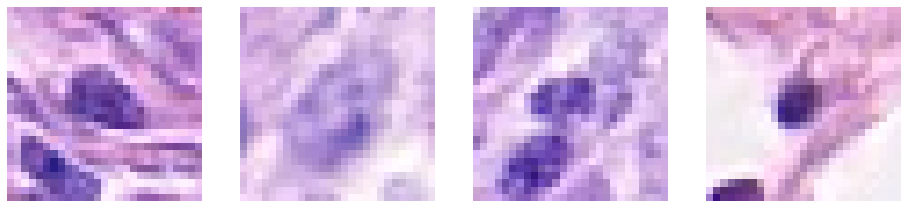

In [37]:
r_inx = np.random.choice(100, 4)

print("Random image " , task1_train_data['ImageName'].iloc[r_inx])
rand_data = task1_train_data['ImageName'].iloc[r_inx]

plt.figure(figsize=(16,4))
for i, image_path in enumerate(rand_data):
    im = np.asarray(Image.open("./data/patch_images/" + image_path))
    plt.subplot(1,4,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')
    
plt.show()

Selecting an train data set of images of array without target column

Selecting a target column of data from train_data

In [38]:
y = np.array(task1_train_data['isCancerous'])
y.shape

(11407,)

In [39]:
print(y)

[0 1 0 ... 0 0 1]


Normalization of the train and validation data with by dividing with 255.

In [40]:
task1_train_datagenerator = ImageDataGenerator(rescale=1./255, data_format='channels_last')
task1_val_datagenerator = ImageDataGenerator(rescale=1./255, data_format='channels_last')
task1_test_datagenerator = ImageDataGenerator(rescale=1./255, data_format='channels_last')
task1_train_data['isCancerous'] = task1_train_data['isCancerous'].astype('str')
task1_val_data['isCancerous'] = task1_val_data['isCancerous'].astype('str')
task1_test_data['isCancerous'] = task1_test_data['isCancerous'].astype('str')

batch_size = 32

task1_train_images = task1_train_datagenerator.flow_from_dataframe(
        dataframe=task1_train_data,
        directory="./data/patch_images",
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

task1_test_images = task1_val_datagenerator.flow_from_dataframe(
        dataframe=task1_test_data,
        directory="./data/patch_images",
        x_col= "ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

task1_val_images = task1_val_datagenerator.flow_from_dataframe(
        dataframe=task1_val_data,
        directory="./data/patch_images",
        x_col= "ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

<ipython-input-40-b2d4ec251589>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task1_test_data['isCancerous'] = task1_test_data['isCancerous'].astype('str')


Found 11407 validated image filenames belonging to 2 classes.
Found 5070 validated image filenames belonging to 2 classes.
Found 3803 validated image filenames belonging to 2 classes.


## Baseline Model: Simple Neural Network with a single Dense layer

This is a supervised learning task and we're starting with a simple single layer Neural Network to explore how well the model can work. For further exploration, we will expand the model using Convolution 2D and Max Pooling blocks based on the VGG Neural Network. 

For this model we are taking seqential series with Flatten layer with input shape (27,27,3) where fully connected network of hidden nodes size 128 as default. We have taken sigmoid as an activation and then output layer set as 2 as the task based on two category classification.

**Model Characteristics**: Our input files are of the resolution 27 x 27 making the input shape (27, 27, 3). We're starting with 128 hidden nodes in the dense layer and using Sigmoid activation with SGD optimizer. 

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
tf.keras.utils.plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


Compile the model using loss function, which illustrate the how accurate the model predicting.


In [43]:
history = model.fit(task1_train_images, validation_data=task1_val_images, epochs=25, verbose=0)

Plot the learning curve to find out how accurate the model predicting and how loss is minimized corresponding with the values of epochs.

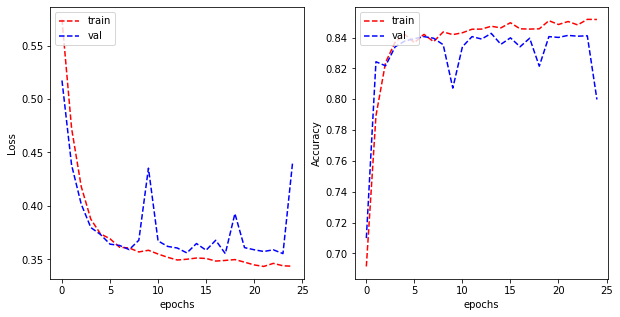

In [44]:
plot_learning_curve(history)

We can see that the data is slightly is slightly overfitting but is within acceptable range and the model can be considered viable. Evaluating this model gives us:

In [45]:
evaluate_model(model, task1_val_images, 32)

[[2396   75]
 [ 686  646]]
F1 score:  0.7461399511188688


### Hyperparameter Tunning

For further tuning the model, we tried the following steps

#### Increase in number of hidden nodes in the Dense layer

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
history = model.fit(task1_train_images,validation_data = task1_val_images, epochs=25, verbose=0)

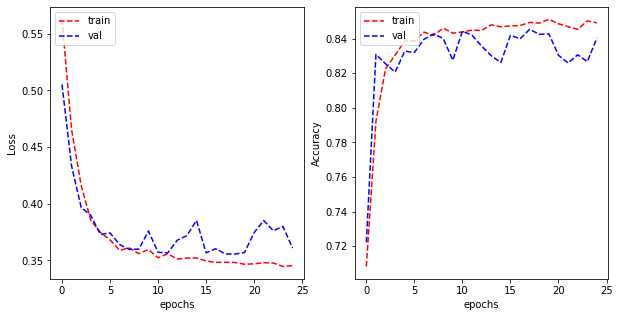

In [48]:
plot_learning_curve(history)

In [49]:
evaluate_model(model, task1_val_images, 32)

[[2130  341]
 [ 266 1066]]
F1 score:  0.826834393629208


#### Trying Adam optimizer instead of SGD

Adam optimizer is a newer which replaces SGD in recent versions of Keras / Tensorflow. 

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
history = model.fit(task1_train_images,validation_data = task1_val_images, epochs=25, verbose=0)

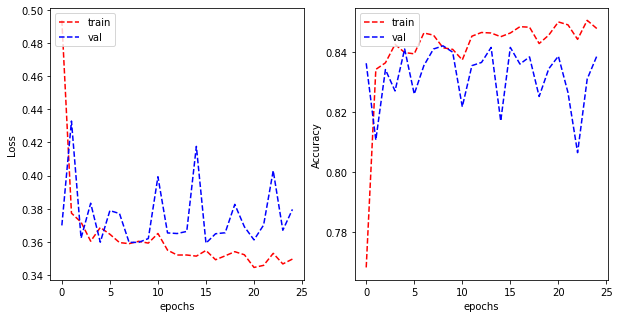

In [52]:
plot_learning_curve(history)

In [53]:
evaluate_model(model, task1_val_images, 32)

[[2303  168]
 [ 446  886]]
F1 score:  0.8125205139816234


By default the Adam optimizer gives us a lower result than default SGD, however we can optimize it further. 

#### Trying higher number of Epochs with a slower learning rate

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
history = model.fit(task1_train_images,validation_data = task1_val_images, epochs=50, verbose=0)

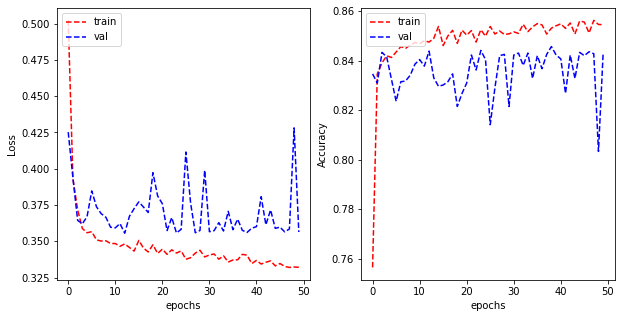

In [56]:
plot_learning_curve(history)

In [57]:
evaluate_model(model, task1_val_images, 32)

[[2186  285]
 [ 311 1021]]
F1 score:  0.8270517361149263


With simple optimization we can get Adam optimizer to give a similar F1 score as SGD for this problem, but even then it requires a much longer training time. So for the isCancerous problem, we will stick to SGD optimizer. 

## A single VGG block

VGG is a deep CNN which uses multiple convolution 2D layers, we use a single such block to further our Neural Network

In [58]:
model = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(2)
])
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [59]:
history = model.fit(task1_train_images, validation_data=task1_val_images, epochs=25, verbose=0)

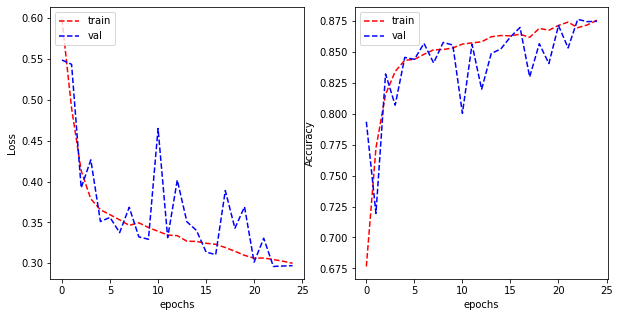

In [60]:
plot_learning_curve(history)

In [61]:
evaluate_model(model, task1_val_images, 32)

[[2241  230]
 [ 246 1086]]
F1 score:  0.8621176188137454


## Augmenting images

Image augmentation introduces additional images with variations such as rotation, width shift, height shift etc. which introduces additional data for the Neural Network to train on. To evaluate this, we take the single VGG block model and add augmented images

In [62]:
task1_augmented_train_datagen = ImageDataGenerator(
        rescale=1./255,
        data_format='channels_last',
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
)

task1_augmented_train_images = task1_augmented_train_datagen.flow_from_dataframe(
        dataframe=task1_train_data,
        directory="./data/patch_images",
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 11407 validated image filenames belonging to 2 classes.


In [63]:
model = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(2)
])
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(task1_augmented_train_images, validation_data=task1_val_images, epochs=25, verbose=0)

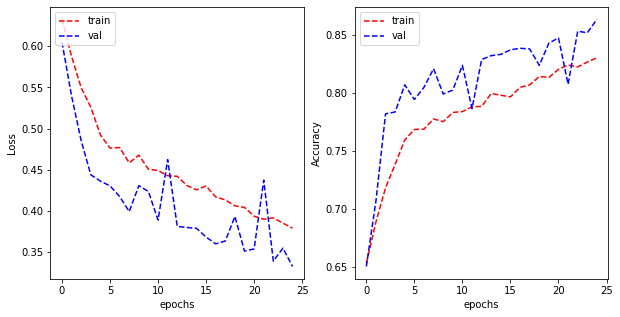

In [64]:
plot_learning_curve(history)

In [65]:
evaluate_model(model, task1_val_images, 32)

[[2261  210]
 [ 309 1023]]
F1 score:  0.8473525279839816


Augmenting the images helps fit the training data better but only marginally improves the F1 score (from 0.847 to 0.849) which can be considered within the margin of error.

## Model with two VGG Blocks

Expanding the idea of a single VGG block, we setup another block. 

In [66]:
model_VGG2 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG Block 2
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(2)
])
model_VGG2.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [67]:
history = model_VGG2.fit(task1_train_images, validation_data=task1_val_images, epochs=25, verbose=0)

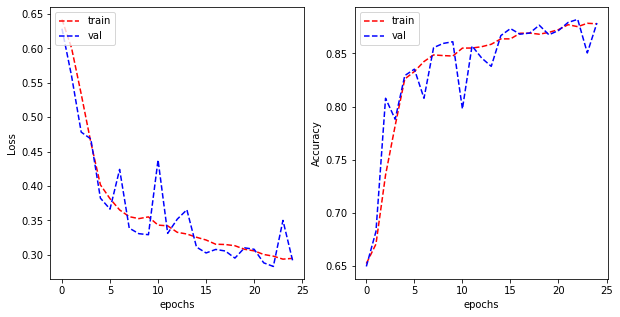

In [68]:
plot_learning_curve(history)

In [69]:
evaluate_model(model_VGG2, task1_val_images, 32)

[[2207  264]
 [ 198 1134]]
F1 score:  0.8680097179276834


A model with two VGG blocks fits the training data much better with no underfitting or overfitting, and it has a 0.006 improvement in F1 score over the model with single VGG block. 

### Two VGG Blocks + Augmented images

In [70]:
model_VGG2_augmented = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG Block 2
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(2)
])

model_VGG2_augmented.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_VGG2_augmented.fit(task1_augmented_train_images, validation_data=task1_val_images, epochs=25, verbose=0)

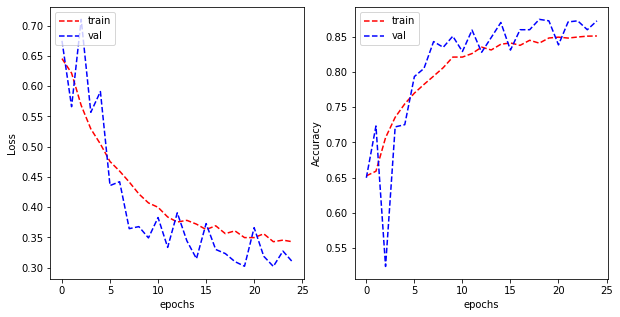

In [71]:
plot_learning_curve(history)

In [72]:
evaluate_model(model_VGG2_augmented, task1_val_images, 32)

[[2228  243]
 [ 241 1091]]
F1 score:  0.8602394525756945


Similar to augmenting with a single VGG block, a model with two VGG blocks has an improvement of 0.003 when augmenting images. 

## Model with three VGG blocks

In [73]:
model_VGG2_3 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG Block 2
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG Block 3
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(2)
])

model_VGG2_3.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [74]:
history = model_VGG2_3.fit(task1_train_images, validation_data=task1_val_images, epochs=25, verbose=0)

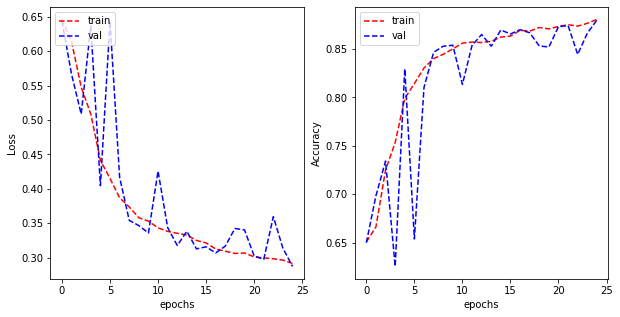

In [75]:
plot_learning_curve(history)

In [76]:
evaluate_model(model_VGG2_3, task1_val_images, 32)

[[2308  163]
 [ 294 1038]]
F1 score:  0.864748380708377


The model with three VGG blocks showed a significant improvement over two blocks, increasing the score to 0.867 from 0.856. 

### Three VGG Blocks + Augmentation

In [77]:
model_VGG2_3_augmented = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG Block 2
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG Block 3
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(2)
])

model_VGG2_3_augmented.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_VGG2_3_augmented.fit(task1_augmented_train_images, validation_data=task1_val_images, epochs=25, verbose=0)

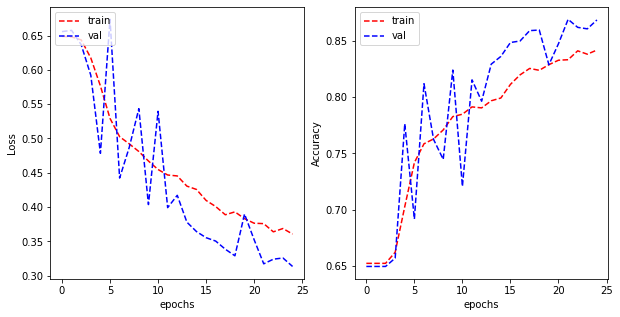

In [78]:
plot_learning_curve(history)

In [79]:
evaluate_model(model_VGG2_3, task1_val_images, 32)

[[2308  163]
 [ 294 1038]]
F1 score:  0.864748380708377


## Model with four VGG Blocks

In [80]:
model_VGG2_4 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG Block 2
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG Block 3
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG Block 4
    tf.keras.layers.Conv2D(216, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(216, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(2)
])

model_VGG2_4.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [81]:
history = model_VGG2_4.fit(task1_train_images, validation_data=task1_val_images, epochs=25, verbose=0)

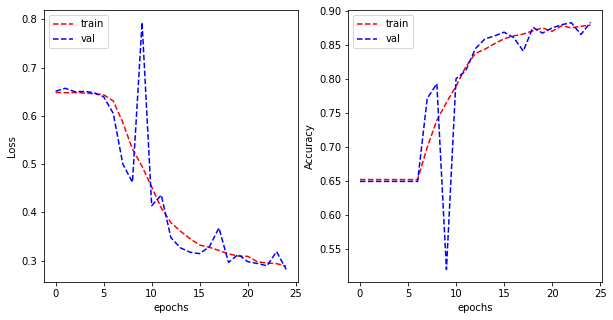

In [82]:
plot_learning_curve(history)

In [83]:
evaluate_model(model_VGG2_4, task1_val_images, 32)

[[2329  142]
 [ 301 1031]]
F1 score:  0.8681539880442994


The score is same as the one for three VGG blocks, hence we will stop at this point. 

## Ultimate judgement for Task 1

For the task of classifing cells based on whether they're cancerous or not (`isCancerous` field), we propose using a CNN model based on the VGG neural network, having three blocks which scale the images to 108 x 108. Image augmentation doesn't improve the score as the model is already able to fit the data well, this model is represented by `model_VGG_3`.

In [84]:
evaluate_model(model_VGG2_3, task1_test_images, 32)

[[3078  219]
 [ 397 1376]]
F1 score:  0.8630696749084186


# Task 2: Cell-type classification

For the second task, we have to classify the images based on the four possible cell-types: Epithelial, Inflamattory, Fibroblast, Miscellaneous. 

## Train Test split for cell-type classification

Similar to Task 1, we split the data into three parts: Train, Test and Validation. 

In [85]:
cell_type_data_frame = main_data_frame[['ImageName', 'cellType']]
task2_train_data, task2_test_data = train_test_split(cell_type_data_frame, test_size=0.25, random_state=42)
task2_train_data, task2_val_data = train_test_split(task2_train_data, test_size=0.25, random_state=42)

In [86]:
task2_train_datagenerator = ImageDataGenerator(rescale=1./255, data_format='channels_last')
task2_test_datagenerator = ImageDataGenerator(rescale=1./255, data_format='channels_last')
task2_val_datagenerator = ImageDataGenerator(rescale=1./255, data_format='channels_last')
task2_train_data['cellType'] = task2_train_data['cellType'].astype('str')
task2_test_data['cellType'] = task2_test_data['cellType'].astype('str')
task2_val_data['cellType'] = task2_val_data['cellType'].astype('str')

batch_size = 32

task2_train_images = task2_train_datagenerator.flow_from_dataframe(
        dataframe=task2_train_data,
        directory="./data/patch_images",
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

task2_test_images = task2_test_datagenerator.flow_from_dataframe(
        dataframe=task2_test_data,
        directory="./data/patch_images",
        x_col= "ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

task2_val_images = task2_val_datagenerator.flow_from_dataframe(
        dataframe=task2_val_data,
        directory="./data/patch_images",
        x_col= "ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 5566 validated image filenames belonging to 4 classes.

<ipython-input-86-30d63fdba53a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task2_test_data['cellType'] = task2_test_data['cellType'].astype('str')



Found 2474 validated image filenames belonging to 4 classes.
Found 1856 validated image filenames belonging to 4 classes.


## Baseline model: CNN based on three VGG Blocks

As we saw in our exploration for Task 1, a model with three VGG blocks works best in the given data which is what we're using as our starting point for Task 2. One change we make is we change the `sigmoid` activation to `relu` as `sigmoid` is preferred for binary classification. 

In [87]:
model = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG Block 2
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG Block 3
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(4)
])

model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [88]:
history = model.fit(task2_train_images, validation_data=task2_val_images, epochs=25, verbose=0)

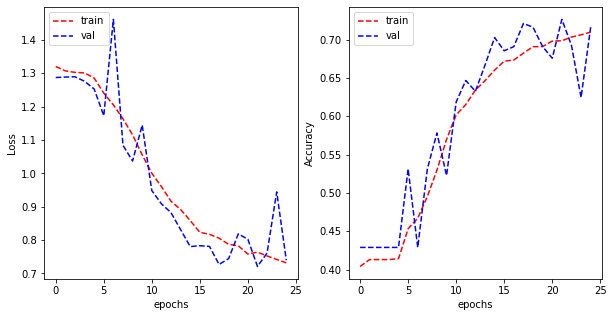

In [89]:
plot_learning_curve(history)

In [90]:
evaluate_model(model, task2_val_images, 32)

[[233  63  23  23]
 [ 22 429  21   8]
 [ 83  77 632   4]
 [ 70 108  25  35]]
F1 score:  0.6086336179338588


### Tuning the baseline model

#### Image augmentation

In [91]:
task2_augmented_train_datagen = ImageDataGenerator(
        rescale=1./255,
        data_format='channels_last',
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
)

task2_augmented_train_images = task2_augmented_train_datagen.flow_from_dataframe(
        dataframe=task2_train_data,
        directory="./data/patch_images",
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 5566 validated image filenames belonging to 4 classes.


In [92]:
model = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG Block 2
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG Block 3
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4)
])

model.compile(optimizer="SGD",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(task2_augmented_train_images, validation_data=task2_val_images, epochs=25, verbose=0)

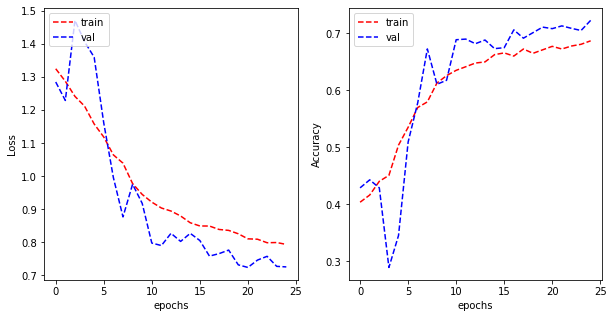

In [93]:
plot_learning_curve(history)

In [94]:
evaluate_model(model, task2_val_images, 32)

[[193  82  38  29]
 [ 11 438  16  15]
 [ 28  95 671   2]
 [ 46 127  26  39]]
F1 score:  0.6121024448670318


#### Reducing number of hidden nodes

In [95]:
model = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG Block 2
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG Block 3
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4)
])

model.compile(optimizer="SGD",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(task2_train_images, validation_data=task2_val_images, epochs=25, verbose=0)

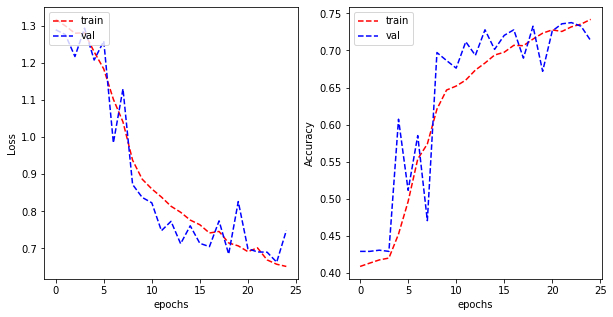

In [96]:
plot_learning_curve(history)

In [97]:
evaluate_model(model, task2_val_images, 32)

[[239  55  13  35]
 [ 16 443   8  13]
 [101  92 593  10]
 [ 57 115  17  49]]
F1 score:  0.6239910260846694


#### Dropout

In [98]:
model = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG Block 2
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG Block 3
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4)
])

model.compile(optimizer="SGD",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(task2_augmented_train_images, validation_data=task2_val_images, epochs=25, verbose=0)

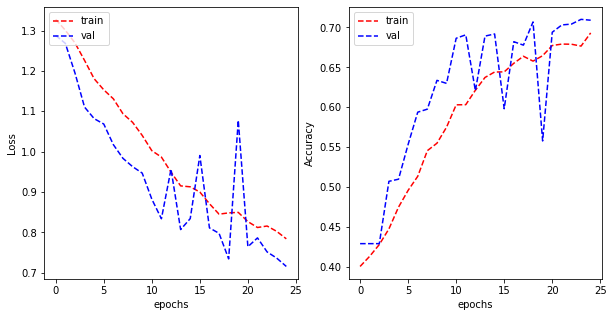

In [99]:
plot_learning_curve(history)

In [100]:
evaluate_model(model, task2_val_images, 32)

[[168  84  83   7]
 [ 19 397  63   1]
 [  8  54 734   0]
 [ 51 128  42  17]]
F1 score:  0.5624628152087804


#### Adam Optimizer

Similar to Task 1, we try the Adam optimizer with a slower learning rate and higher number of epochs to see if it gives us an improvement

In [101]:
model_cell_type_adam = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG Block 2
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG Block 3
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4)
])

model_cell_type_adam.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_cell_type_adam.fit(task2_augmented_train_images, validation_data=task2_val_images, epochs=50, verbose=0)

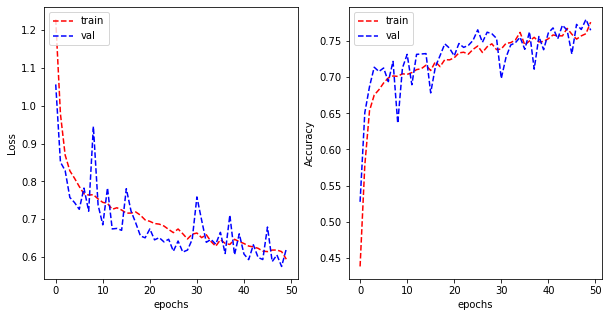

In [102]:
plot_learning_curve(history)

In [103]:
evaluate_model(model_cell_type_adam, task2_val_images, 32)

[[207  49  33  53]
 [  7 381  18  74]
 [ 30  49 678  39]
 [ 18  49  17 154]]
F1 score:  0.7181829006500073


## Model with four VGG Blocks

We investigated a model with four blocks to see whether it helps with cell-type classifications

In [104]:
model = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG Block 2
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG Block 3
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG Block 4
    tf.keras.layers.Conv2D(216, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(216, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(4)
])

model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [105]:
history = model.fit(task2_augmented_train_images, validation_data=task2_val_images, epochs=25, verbose=0)

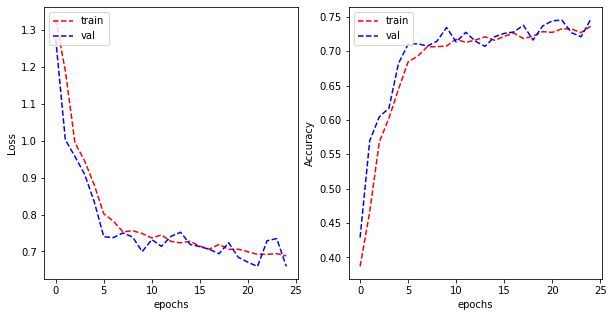

In [106]:
plot_learning_curve(history)

In [107]:
evaluate_model(model, task2_val_images, 32)

[[234  44  33  31]
 [ 29 394  28  29]
 [ 43  69 683   1]
 [ 42  94  28  74]]
F1 score:  0.6687929630940996


## Investigating Extra Data for improving the CNN with Transfer Learning

For the bonus task, we are required to use the extraData to improve the cell-type classification model. Since the data itself is missing cell-type classification, we cannot directly use it as our training data. But we can use the model we trained for Task 1 through Transfer Learning and investigate whether it gives a better result than using a model trained from scratch. 

Our current ideal model for Task 1 looks like:

In [108]:
model_VGG2_3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 27, 27, 27)        756       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 27, 27, 27)        6588      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 27)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 54)        13176     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 54)        26298     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 54)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 6, 6, 108)        

For implementing Transfer Learning, we start by removing the output layer in the model and then adding a single output layer to investgiate how the model does with essentially no training

In [109]:
model_VGG2_3.layers[:-3]

### Replacing the output layer

In [110]:
inner_model = tf.keras.Sequential(model_VGG2_3.layers[:-1])
inner_model.trainable = False

model = tf.keras.Sequential([
  inner_model,
  tf.keras.layers.Dense(4)
])

In [111]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [112]:
history = model.fit(task2_train_images, validation_data=task2_val_images, epochs=50, verbose=0)

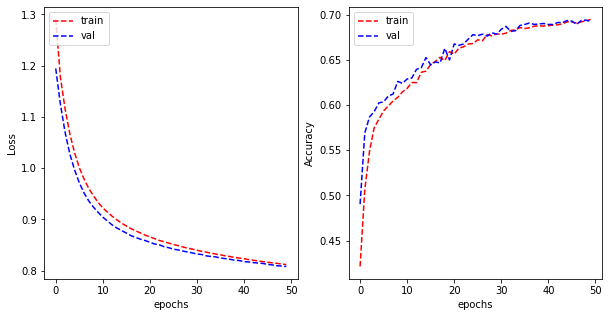

In [113]:
plot_learning_curve(history)

In [114]:
evaluate_model(model, task2_val_images, 32)

[[168 118  54   2]
 [ 20 399  60   1]
 [ 19  62 715   0]
 [ 61 136  38   3]]
F1 score:  0.525771006179986


### Adding a fully connected layer to the model

In [115]:
inner_model = tf.keras.Sequential(model_VGG2_3.layers[:-1])
inner_model.trainable = False

model = tf.keras.Sequential([
  inner_model,

  tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(4)
])

In [116]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(task2_train_images, validation_data=task2_val_images, epochs=50, verbose=0)

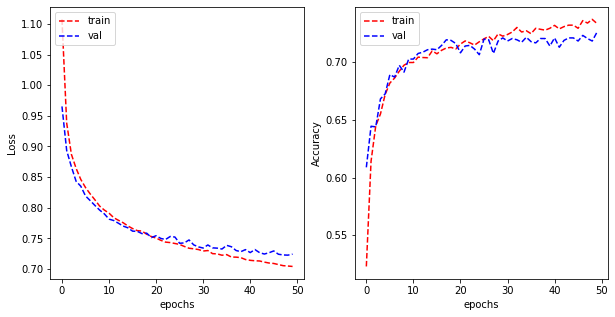

In [117]:
plot_learning_curve(history)

In [118]:
evaluate_model(model, task2_val_images, 32)

[[198  64  46  34]
 [ 23 398  45  14]
 [ 35  56 704   1]
 [ 59  99  33  47]]
F1 score:  0.6191968100404002


### Removing the original fully connected layer

In [119]:
inner_model = tf.keras.Sequential(model_VGG2_3.layers[:-3])
inner_model.trainable = False

model = tf.keras.Sequential([
  inner_model,

  tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(4)
])

In [120]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(task2_train_images, validation_data=task2_val_images, epochs=50, verbose=0)

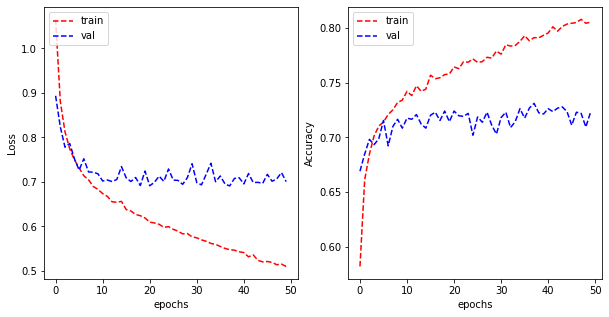

In [121]:
plot_learning_curve(history)

In [122]:
evaluate_model(model, task2_val_images, 32)

[[214  41  58  29]
 [ 32 351  67  30]
 [ 32  44 710  10]
 [ 56  84  31  67]]
F1 score:  0.636954290790913


### Utilising just the first VGG Block then adding two new blocks

In [123]:
inner_model = tf.keras.Sequential(model_VGG2_3.layers[:-9])
inner_model.trainable = False

model = tf.keras.Sequential([
  inner_model,

  #VGG Block 2
  tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D((2, 2)),

  #VGG Block 3
  tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D((2, 2)),

  tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(4)
])

In [124]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(task2_train_images, validation_data=task2_val_images, epochs=50, verbose=0)

In [125]:
evaluate_model(model, task2_val_images, 32)

[[215  42  49  36]
 [ 41 357  58  24]
 [ 30  39 717  10]
 [ 42  88  31  77]]
F1 score:  0.6550242754579315


### Unlocking last two layers in the original model

In [126]:
inner_model = tf.keras.Sequential(model_VGG2_3.layers[:-3])
for layer in inner_model.layers[:-2]:
    layer.trainable = False

model = tf.keras.Sequential([
  inner_model,

  tf.keras.layers.Flatten(input_shape=(27, 27, 3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(4)
])

In [127]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(task2_train_images, validation_data=task2_val_images, epochs=50, verbose=0)

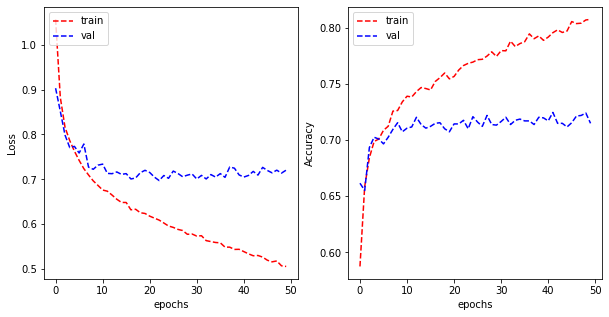

In [128]:
plot_learning_curve(history)

In [129]:
evaluate_model(model, task2_val_images, 32)

[[243  41  44  14]
 [ 48 365  52  15]
 [ 45  59 688   4]
 [ 81 100  26  31]]
F1 score:  0.600241465161984


## Ultimate Judgement for Task 2

The models based on Transfer Learning showed improvements over the base model, but the best model was still one which was fully trained using 3 VGG Blocks and optimised using the Adam optimizer, represented by the `model_cell_type_adam` variable. 

In [130]:
evaluate_model(model_cell_type_adam, task2_test_images, 32)

[[317  66  29  84]
 [ 14 498  23  90]
 [ 46  59 841  38]
 [ 36  85  28 220]]
F1 score:  0.7192273836304816
